# 5. 데이터 전처리

## 5.1 이상치 확인 및 정제

### 5.1.1 이상치

👀 **Definition**
> 결측치 혹은 값이 크게 차이가 나는 데이터

- 이상치는 측정의 변동성, 실험의 오류, 측정 장비의 이상 등으로 발생할 수 있음
- 이상치는 분석 모델의 성능을 떨어뜨리거나 분석 결과에 악영향을 줄 수 있음 ☞ 제거 혹은 처리 필요

📍 **이상치의 종류**

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/outlier_type.png?raw=true" width="400" height="200"></p>

✏️ **더 알아보기**
- 😗: 데이터가 너무 많아서 일일이 확인하기 어려운데 이상치를 한방에 확인할 수 있을까요?
- 😀: 4.2 상자그림에서 배운 IQR 방식을 사용하여 이상치를 확인할 수 있습니다!

📜 **예제**

> wine 데이터 세트의 color_intesnity 컬럼에서 IQR 방식으로 이상치를 탐색해보기

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# 데이터 가져오기
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


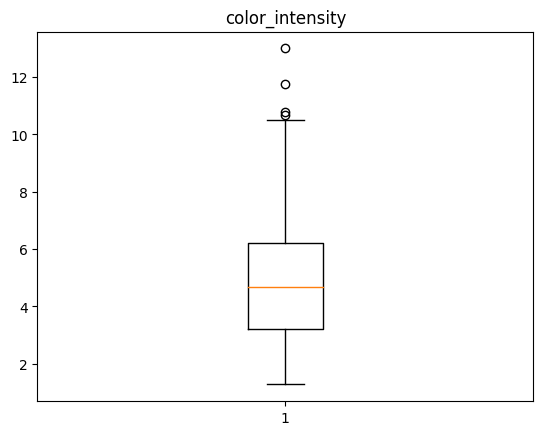

In [17]:
# box plot 그리기
plt.boxplot(wine['color_intensity'])
plt.title('color_intensity')
plt.show()

In [18]:
import numpy as np

# 이상치 함수
def outliers_iqr(dt, col):
 quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
 iqr = quartile_3 - quartile_1
 lower_whis = quartile_1 - (iqr * 1.5)
 upper_whis = quartile_3 + (iqr * 1.5)
 outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
 return outliers[[col]]

In [19]:
# 이상치 확인
outliers = outliers_iqr(wine,'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


📜 **예제**

> 이상치를 제거하거나 대체하는 방식으로 데이터 전처리를 수행해보기

**1. 이상치 제거**

In [20]:
# 인덱스 기준으로 이상치 행 추출
drop_index = wine[wine.index.isin(outliers.index)].index
drop_index

Int64Index([151, 158, 159, 166], dtype='int64')

In [21]:
print("이상치 삭제 전:", wine.shape)
# 이상치 삭제
drop_wine = wine.drop(drop_index)
print("이상치 삭제 후:", drop_wine.shape)

이상치 삭제 전: (178, 14)
이상치 삭제 후: (174, 14)


**2. 이상치 대체**

- 이상치를 결측치로 변환 후 결측치 대체 방식 사용

In [23]:
# 인덱스를 기준으로 이상치를 결측치로 변경
wine.loc[drop_index, 'color_intensity'] = np.nan
print("결측치:", wine['color_intensity'].isnull().sum())

결측치: 4


In [25]:
# 결측치를 평균값으로 대체
wine['color_intensity'].fillna(wine['color_intensity'].mean(), inplace=True)
# 확인
wine.loc[drop_index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

## 5.2 범주형 변수 처리

범주형 변수는 값이 수학적 연산으로 모델을 생성하는 대부분의 분석 도구에서 직접 사용할 수 없어 특별한 처리가 필요합니다. 이를 인코딩이라고 부르며 라벨 인코딩과 원핫 인코딩이 대표적입니다.

### 5.2.1 라벨 인코딩

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/label.png?raw=true" width="300" height="150"></p>

👀 **Definition**
> 알파벳 순서로 숫자를 할당
- 변환된 숫자가 순위를 잘못 나타내는지 확인 필요

In [26]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩을 위한 데이터 생성
item_label = ['b','a','c','d','a','b']

# 라벨 인코딩 객체 생성
encoder = LabelEncoder()

# 라벨 인코딩 수행
encoder.fit(item_label)

encoder

LabelEncoder()

In [27]:
# 라벨 인코딩 결과 확인
vars(encoder)

{'classes_': array(['a', 'b', 'c', 'd'], dtype='<U1')}

- 중복이 제거되며 각 원소마다 라벨이 부여됨

In [29]:
# 라벨 인코딩 적용
test_label = ['a','a','b','d','c']
digit_label = encoder.transform(test_label)
print(digit_label)

[0 0 1 3 2]


In [30]:
# 라벨 인코딩 원복
print(encoder.inverse_transform(digit_label))

['a' 'a' 'b' 'd' 'c']


### 5.2.2 원핫 인코딩

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/onehot.png?raw=true" width="450" height="150"></p>

👀 **Definition**
> 범주형 변수를 이진화 시킴 
- 0 또는 1로써 범주형 변수를 표현하는 기법
- 범주가 다양할 경우 0이 많아지는 문제가 발생함

In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 원핫 인코딩을 위한 데이터 생성
data_dic = {'label':['Apple', 'Banana', 'Pear', 'Apple', 'Mango']}
df = pd.DataFrame(data_dic)
df

,label
0,Apple
1,Banana
2,Pear
3,Apple
4,Mango


In [2]:
# 원핫 인코딩 객체 생성
oh = OneHotEncoder(sparse_output=False)

# 원핫 인코딩 수행
oh.fit(df)
oh

OneHotEncoder(sparse_output=False)

In [3]:
# 원핫 인코딩 결과 확인
vars(oh)

{'categories': 'auto',
 'sparse': 'deprecated',
 'sparse_output': False,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'drop': None,
 'min_frequency': None,
 'max_categories': None,
 '_infrequent_enabled': False,
 'n_features_in_': 1,
 'feature_names_in_': array(['label'], dtype=object),
 'categories_': [array(['Apple', 'Banana', 'Mango', 'Pear'], dtype=object)],
 '_drop_idx_after_grouping': None,
 'drop_idx_': None,
 '_n_features_outs': [4]}

In [4]:
# 원핫 인코딩 적용
oh_encoded = oh.transform(df)
oh_encoded

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

- 원핫 인코딩 수행시 배열 형태가 생성됨

In [7]:
oh_df = pd.DataFrame(oh_encoded.astype('int'), columns=oh.get_feature_names_out(['label']), index=df.index)
oh_df

,label_Apple,label_Banana,label_Mango,label_Pear
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [96]:
# 원핫 인코딩 원복
oh.inverse_transform(pd.DataFrame([1, 0, 0, 0]).T)

array([['Apple']], dtype=object)

✏️ **더 알아보기**
- 😗: 언제 어떤 인코딩을 사용해야 하나요?
- 😀: Label 인코딩은 범주형 변수가 순서가 있거나, 범주 고유값의 개수가 많아 One-hot 적용시 메모리에 이슈가 있을 때 사용합니다. (예시: 학년, 직급 등)
- 😀: One-hot 인코딩은 순서가 없으며 고유값의 개수가 많지 않을때 사용합니다. (예시: 과일가게에서 파는 과일의 종류)

## 5.3 데이터 분할

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/data_split.png?raw=true" width="550" height="350"></p>

👀 **Definition**
> 분석 모델을 학습하고 성과를 확인하기 위해서 데이터를 Train과 Test 세트로 나누는 것

📌 **train_test_split**

> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, train_size=None, stratify=None)

- X: 독립변수(데이터프레임)
- y: 종속변수(list)
- test_size: 테스트 사이즈 비율
- stratify: 동일 비율로 나눌 컬럼

📜 **예제**

> iris 데이터를 train 0.8, test 0.2 비율로 나누어보기

In [47]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
print("총 데이터 수: ",len(iris))

총 데이터 수:  150


In [45]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, random_state=1004)
print('X_train :', X_train.shape, ' X_test :', X_test.shape)
print('y_train :', y_train.shape, ' y_test :', y_test.shape)

X_train : (120, 4)  X_test : (30, 4)
y_train : (120,)  y_test : (30,)


✏️ **더 알아보기**
- 😗: 데이터 분할이 잘못되어 문제집에 없는 문제가 수능에 나오면 어떻게 되나요?
- 😀: 데이터 분할을 적절히 하지 못해 불균형이 일어나게 된다면, 분석모델의 성능평가에 대한 신뢰성이 떨어지게 됩니다. 이럴 경우 데이터 분할을 적절히 수행하여 모든 문제가 골고루 분할되도록 하는 층화추출 기법으로 해결할 수 있습니다.

📍 **층화 추출**

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/stratify.png?raw=true" width="500" height="250"></p>

- 층화추출을 통해 데이터를 골고루 분배할 수 있음

📜 **예제**

> 임의로 분할한 데이터셋의 클래스 분포를 확인하고, 층화추출을 통해 target의 불균형 문제를 해결해보기

In [52]:
# 임의 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, random_state=1002)

# 클래스 분포 확인
y_train.value_counts()

Virginica      43
Versicolour    39
Setosa         38
Name: Class, dtype: int64

In [54]:
# 층화추출로 iris['Class']를 고루게 분포시킴
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), 
                                                    iris['Class'], test_size = 0.2, 
                                                    stratify =iris['Class'])
# 클래스 분포 확인
y_train.value_counts()

Virginica      40
Setosa         40
Versicolour    40
Name: Class, dtype: int64

## 5.4 데이터 스케일링

현업에서 학습에 사용되는 데이터들은 각 컬럼이 가지는 값의 범위가 다양합니다. 예를들어 태양광 발전량 예측을 위해 사용하는 컬럼 중 온도는 약 -10~35이고 강수량은 0~1,000까지 나타날 수 있습니다. 이렇게 각 컬럼별 단위가 크게 차이가 날 경우 분석모델은 대체로 값이 큰 쪽에 편향되어 학습을 하고, 값이 작은 쪽의 영향은 작다고 판단하기에 좋은 성능을 낼 수 없습니다. 따라서 각 컬럼의 범위를 균일화 하는 스케일링을 통해 이러한 문제를 해결해야 합니다.


📍 **데이터 스케일링 수행 시점**

데이터 스케일링은 학습 데이터에 대해서만 수행하며, 분석 모델 설계, 학습 시 validation, test 데이터는 아직 보지 못했다고 가정하기 때문에 데이터를 분할한 뒤 사용합니다.

### 5.4.1 Standard Scaler

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/std_scaler.png?raw=true" width="500" height="150"></p>

- 데이터를 평균이 0, 분산이 1인 정규분포로 스케일링함

📜 **예제**

> iris 데이터에 대한 데이터 분포를 확인하고 standard scaling을 수행한 뒤 분포를 재확인해보기

In [62]:
# 원본 분포
# 데이터 프레임을 넘파이 배열로 변환
# 각 컬럼별이 아닌 모든 데이터의 연산을 수행하기 위함 (dataframe.function()은 컬럼별 연산)
print ('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(np.array(X_train).min(), 
                                                 np.array(X_train).max(), 
                                                 np.array(X_train).mean(), 
                                                 np.array(X_train).std()))
print ('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(np.array(X_test).min(), 
                                                np.array(X_test).max(), 
                                                np.array(X_test).mean(), 
                                                np.array(X_test).std()))

Train_scaled (0.10, 7.90) (3.47, 1.99)
Test_scaled (0.10, 7.40) (3.43, 1.92)


In [63]:
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)
# 결과 확인
print('\t\t(min, max) (mean, std)')
print ('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(), 
                                                 X_train_sc.max(), 
                                                 X_train_sc.mean(), 
                                                 X_train_sc.std()))
print ('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(), 
                                                X_test_sc.max(), 
                                                X_test_sc.mean(), 
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.48, 2.70) (-0.00, 1.00)
Test_scaled (-2.01, 3.17) (-0.03, 0.98)


### 5.4.2 Min-max Scaler

- 컬럼들을 0과 1 사이의 값으로 스케일링 하는 방식
- 최솟값이 0 최댓값이 1

📜 **예제**

> iris 데이터에 min-max scaling을 수행한 뒤 분포를 확인해보기

In [64]:
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()
# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)
# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)
print('\t\t(min, max) (mean, std)')
print ('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(), 
                                                 X_train_sc.max(), 
                                                 X_train_sc.mean(), 
                                                 X_train_sc.std()))
print ('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(), 
                                                X_test_sc.max(), 
                                                X_test_sc.mean(), 
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.46, 0.27)
Test_scaled (0.00, 1.09) (0.45, 0.26)


🔥 **꿀팁**
- scaling은 수치형 컬럼들에 대해 적용
- scaling은 이상치에 민감하기에 이상치 처리 후 수행
- 분류분석일 경우 standard
- 회귀분석일 경우 min-max

## 5.5 차원 축소

분석 모델을 구축하기 위해 다양한 데이터를 수집하게 됩니다. 이때, 목적이 되는 종속변수를 예측하기 위해 다양한 요인들을 모두 고려한다는 취지로 많은 독립변수를 사용하게되면 오히려 성능이 떨어지는 경우를 확인할 수 있습니다. 이는 차원의 저주라고 불리는 문제로 야기되며, 이를 해결하기위해 여러개의 컬럼을 몇 개로 축소하는 설명변수 선택 혹은 주성분 분석과 같은 차원축소 기법이 사용됩니다.

📍 **차원의 저주**

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/dimension.png?raw=true" width="500" height="350"></p>

- 컬럼이 늘어날수록 차원도 1차원, 2차원, 3차원으로 늘어남
- 차원이 늘어날수록 데이터 간의 거리가 멀어지고, 이는 전체 영역에서 대한 데이터의 설명력이 줄어듦을 뜻함

### 5.5.1 설명변수 선택
- EDA에서 상관관계가 높았던 설명변수만을 사용 ☞ 해석이 용이함
- 그러나 고차원적으로 갈 수록 데이터간의 상관관계를 고려하기 어려움

### 5.5.2 주성분 분석(PCA)

- 여러 컬럼을 사용하는 대신 이를 잘 나타내는 주성분들로만 선택하여 사용
- 주성분 분석은 수치형 데이터에만 사용
- 스케일 차이가 주성분에 영향을 주는것을 방지하기 위해 스케일링 수행
- 주성분의 개수를 알아내는 방법은 분산 설명력의 누적 합을 보거나 scree plot의 꺾인점(=elbow point)을 확인
- 분산 설명력의 누적합이 0.9 이상인 지점
- scree plot에서 기울기가 급격히 감소하는 지점 직전

📜 **예제**

> iris 데이터셋에 대해 주성분 분석을 수행하여 차원을 축소해보기

In [66]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [67]:
# 수치형 데이터만 추출
x = iris.drop(columns = 'Class')
# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [72]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 4) 
pca_fit = pca.fit(x)
print('고유 값 : ', pca.singular_values_)
print('분산 설명력: ', pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


🔬 **주성분 분석 결과해석**
- 분산 설명력이 2번째 주성분까지 누적 0.9를 넘었으므로 주성분을 2개 선택함
- 기존 4차원의 데이터를 2차원으로 축소

📍 **분산 설명력**
- 전체 데이터에서 각 주성분이 설명할 수 있는 분산의 비율
- 누적하여 0.9 이상이면 해당 개수까지 주성분으로 선택

📜 **예제**

> Scree plot으로 주성분 개수 구하기

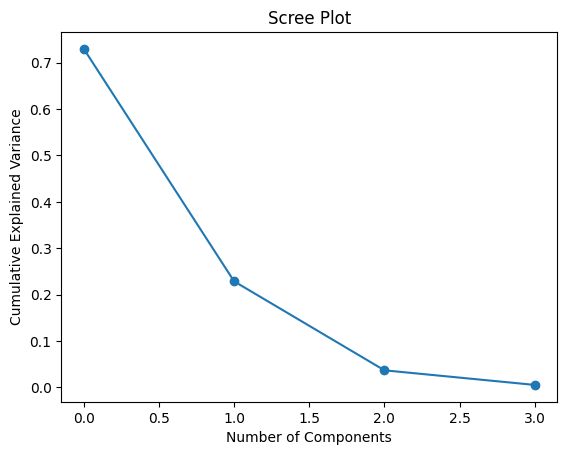

In [73]:
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

🔬 **scree plot 결과해석**
- 그래프의 기울기가 2.0 지점에서 급격히 줄어들기 때문에 0, 1 두개를 주성분으로 선택할 수 있음

📜 **예제**

> iris 데이터에 대해 PCA를 수행하여 적절한 주성분 개수를 찾고, 전체 데이터를 주성분에 대해 시각화 해보기

In [74]:
# PCA 객체 생성 (주성분 개수 2개 생성)
pca = PCA(n_components = 2)
# 2개의 주성분을 가진 데이터로 변환
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame (data = principalComponents, columns =['pc1', 'pc2']) 
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


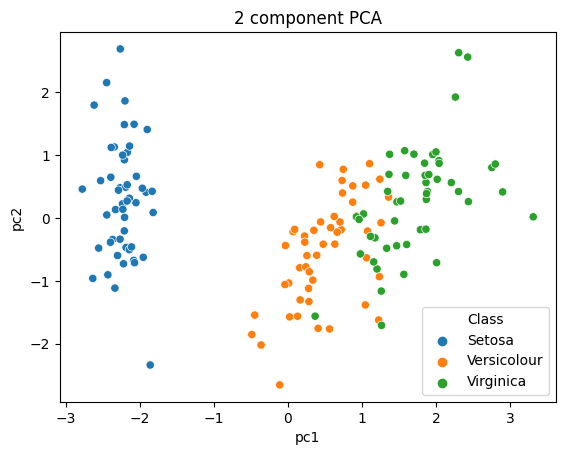

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('2 component PCA' )
sns.scatterplot (x = 'pc1', y = 'pc2', 
                 hue = iris.Class, 
                 data = principal_iris)
plt.show()

📍 **주성분 분석의 시각화 기능**

- 주성분 분석은 차원의 저주를 해결하기 위해 컬럼을 줄이는 역할을 수행하는 것 이외로 시각화에 사용됨
- 100개의 컬럼이 있는 데이터셋이면 100차원의 데이터 ☞ 우리는 3차원만을 시각화 할 수 있음
- 따라서 주성분 분석을 통해 우리가 인지할 수 있는 차원으로 데이터를 줄여 시각화에 사용될 수 있음
- 주성분 분석으로 차원이 줄어들었어도 분산 설명력에 의거해 전체 데이터를 잘 설명할 수 있음

## 5.6 데이터 불균형 문제 처리

데이터 불균형 문제는 클래스 분포가 극도로 불균형하여 일부 클래스가 다른 클래스에 비해 압도적으로 많은 데이터를 가지고 있을 때 발생합니다. 예를 들어, 이진 분류 문제에서 긍정 클래스(예: 사기 거래)가 전체 데이터의 1%를 차지하고, 부정 클래스(예: 정상 거래)가 99%를 차지하는 경우, 모델이 부정 클래스만 예측해도 높은 정확도를 보일 수 있습니다. 이는 모델이 소수 클래스의 패턴을 제대로 학습하지 못하게 하여 예측 성능이 저하됩니다. 즉, 데이터 불균형 문제는 모델의 예측 성능을 저하시킬 수 있는 중요한 문제입니다. 이를 해결하기 위해 다양한 기법을 활용할 수 있으며 이번 섹션에서는 그 중 sampling에 대해 다루어 보겠습니다.

<p align="center"><img src="https://github.com/sigirace/page-images/blob/main/kang_lectures/python_preprocessing/unbalance.png?raw=true" width="400" height="250"></p>

### 5.6.1 언더샘플링

👀 **Definition**

> 작은 클래스에 맞추어 전체 데이터를 감소하는 기법으로 불균형은 해결할 수 있으나 데이터가 적은 경우 학습 성능을 떨어뜨릴 수 있음

📜 **예제**

> 언더샘플링 수행 해보기

In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링을 위한 불균형 데이터 생성
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [78]:
# 언더샘플링 수행
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


### 5.6.2 오버샘플링

👀 **Definition**

> 다수 레이블에 맞춰 소수 레이블의 데이터를 증식시키는 방법으로 일반적으로 언더 샘플링보다 보통 유용함

📜 **예제**

> 오버샘플링 수행 해보기

In [80]:
from imblearn.over_sampling import RandomOverSampler
# 오버샘플링 수행
oversample = RandomOverSampler() 
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


🔥 **꿀팁**

- 데이터 불균형 문제는 분류 문제에 주로 사용됨 ☞ 종속변수에 대한 처리
- 회귀 문제에서 범주형 데이터에 불균형이 있을 경우 사용할 수 있음 ☞ 설명변수에 대한 처리